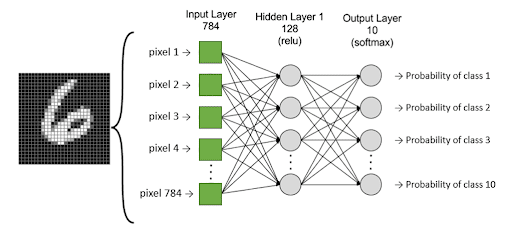
![WhatsApp Image 2025-07-09 à 15.19.10_0320403d.jpg](<attachment:WhatsApp Image 2025-07-09 à 15.19.10_0320403d.jpg>)
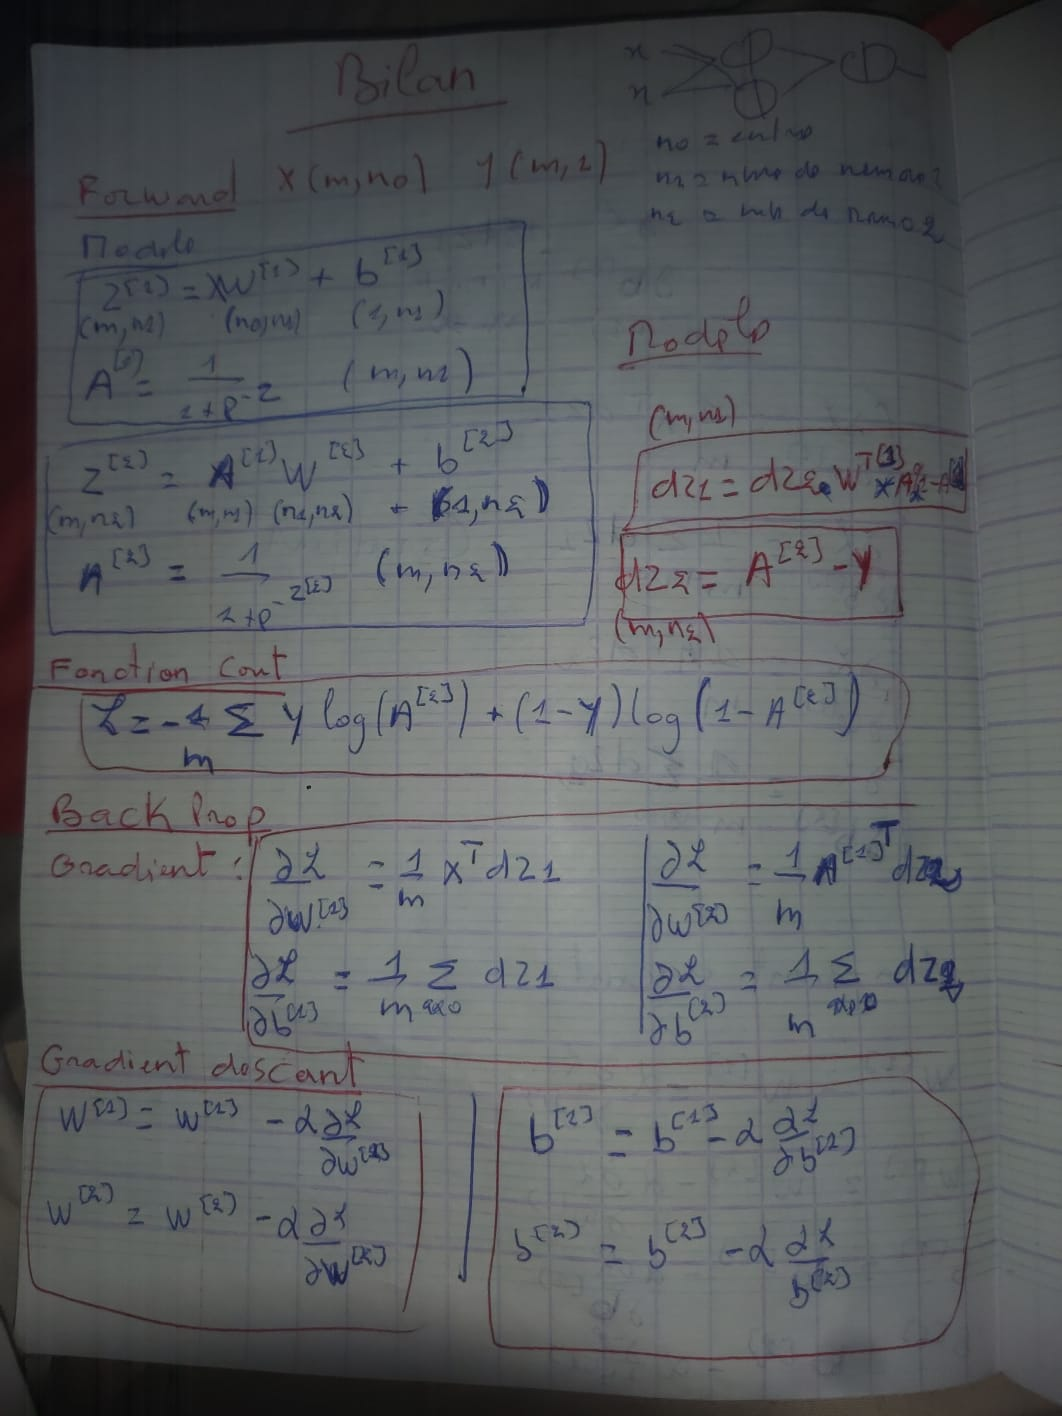

In [63]:
# Je declare que ce code est de moi, et que je n'ai pas copié d'autres personnes.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets   import make_blobs
from sklearn.metrics import accuracy_score
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.datasets   import make_circles

In [113]:
np.random.seed(42)  # Pour la reproductibilité

experience_years = np.random.randint(0, 15, size=1000)  # Expérience entre 0 et 14 ans
projet = np.random.randint(0, 10, size=1000)           # Nombre de projets entre 0 et 9

# Règle simple : embaucher si experience + projet > 12, sinon non
embaucher = np.where(experience_years + projet > 12, 1, 0)

dat = {
    'experience_years': experience_years.tolist(),
    'projet': projet.tolist(),
    'embaucher': embaucher.tolist()
}

# Affichage rapide des 10 premiers exemples
for i in range(10):
    print(f"Exp: {dat['experience_years'][i]}, Projet: {dat['projet'][i]}, Embaucher: {dat['embaucher'][i]}")

Exp: 6, Projet: 0, Embaucher: 0
Exp: 3, Projet: 2, Embaucher: 0
Exp: 12, Projet: 3, Embaucher: 1
Exp: 14, Projet: 0, Embaucher: 1
Exp: 10, Projet: 0, Embaucher: 0
Exp: 7, Projet: 7, Embaucher: 1
Exp: 12, Projet: 1, Embaucher: 1
Exp: 4, Projet: 7, Embaucher: 0
Exp: 6, Projet: 6, Embaucher: 0
Exp: 9, Projet: 9, Embaucher: 1


In [114]:
data=pd.DataFrame(dat)
data

,experience_years,projet,embaucher
0,6,0,0
1,3,2,0
2,12,3,1
3,14,0,1
4,10,0,0
...,...,...,...
995,0,1,0
996,4,5,0
997,13,1,1
998,8,2,0


In [115]:
X=data[['experience_years','projet']].to_numpy()
Y=data['embaucher'].to_numpy().reshape(-1,1)
X.shape,Y.reshape(-1,1).shape

((1000, 2), (1000, 1))

In [116]:
X,Y

(array([[ 6,  0],
        [ 3,  2],
        [12,  3],
        ...,
        [13,  1],
        [ 8,  2],
        [13,  5]], shape=(1000, 2)),
 array([[0],
        [0],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [0],
        [1],
        [0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1],
        [1],
        [0],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [1],
        [1],
  

# Forward propagation

## Neurone

In [117]:
def model(x,w,b):
    return x.dot(w)+b
def activation(z):
    return 1/(1+np.exp(-z))
def loss(A,Y):
    return -np.mean(Y*np.log(A)+(1-Y)*np.log(1-A))

# Back propagation

## Gradient

In [118]:
def dz2_fonction(A,Y):
    return A-Y
def dz1_fonction(dz2,w2,A1):
    return dz2.dot(w2.T)*(A1*(1-A1))

def gradient_w(x,dz1):
    m=x.shape[0]
    return (x.T.dot(dz1))/m
def gradient_b(dz1,m):
    return (np.sum(dz1,axis=0,keepdims=True))/m

# Reseau de neurone

In [127]:
def predict(x,parametre,couches):
        taille=len(couches)
        for i in range(taille):
          Z1=model(x,parametre["w"+str(i)],parametre["b"+str(i)])
          A1=activation(Z1)
          x=A1
        return (x > 0.5).astype(int)

def build_models(X,y,parametres,couches):
    models={}
     
    for i in range(len(couches)):
         models["Z"+str(i)]=model(X,parametres["w"+str(i)],parametres["b"+str(i)])
         models["A"+str(i)]=activation(models["Z"+str(i)]) 
         X=models["A"+str(i)]
    loss_fucnt=loss(X,y) 
    return models,loss_fucnt

def dz_fonction(models, y, param, couches):
    taille = len(couches)
    dz = {}
    dz["dz" + str(taille - 1)] = dz2_fonction(models["A" + str(taille - 1)], y)
    for i in range(taille - 2, -1, -1):
        dz["dz" + str(i)] = dz1_fonction(dz["dz" + str(i + 1)], param["w" + str(i + 1)], models["A" + str(i)])
    return dz

def update(x,params,models,dz,learning_rate,couches):
     taille=len(couches)
     for i in range(taille):
          params["w"+str(i)]=params["w"+str(i)] - learning_rate * gradient_w(x,dz["dz"+str(i)])
          params["b"+str(i)]=params["b"+str(i)] - learning_rate * gradient_b(dz["dz"+str(i)],x.shape[0])
          x=models["A"+str(i)]
     return params


In [128]:
def reseau_neurone(x,y,parametre,couches,epoch=100,learning_rate=0.1):
    loss_graph=[]
    accuracy_graph=[]
    for i in range(epoch):
        models,l=build_models(x,y,parametre,couches)
        loss_graph.append(l)
        dz=dz_fonction(models,y,parametre,couches)
        parametre=update(x,parametre,models,dz,learning_rate,couches)
        y_pred=predict(x,parametre,couches)
        accuracy=accuracy_score(y,y_pred)
        accuracy_graph.append(accuracy)
        if i%100==0:
            print("Loss ",l,"Accuracy ",accuracy)
        plt.plot(loss_graph)
        plt.plot(accuracy_graph)
    return parametre

# Initialisation

In [129]:

couches=[2,4,1,8,4,1]
def init_weights(nbr_inputs,couches):
    parametre={}
    for i in range(0,len(couches)):
       parametre["w"+str(i)]=np.random.randn(nbr_inputs,couches[i])*0.01
       parametre["b"+str(i)]=np.ones((1,couches[i]))
       nbr_inputs=couches[i]  
    return parametre

X,Y=make_circles(shuffle= True, noise=0.2, factor=0.5, random_state=1,n_samples=200)
Y=Y.reshape(-1,1)

param=init_weights(X.shape[1],couches) 
model_results,l = build_models(X,Y, param, couches)
model_results["Z0"],l
dz=dz_fonction(model_results,Y,param,couches)
param=update(X,param,model_results,dz,learning_rate=0.01,couches=couches)
param
a=predict(X,param,couches)
a


array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [130]:
# X,Y=make_circles(shuffle= True, noise=0.2, factor=0.5, random_state=1,n_samples=200)
# Y=Y.reshape(-1,1)
# plt.scatter(X[:,0],X[:,1],c=Y,cmap='bwr',edgecolors='k')

Loss  0.8810043859400977 Accuracy  0.431
Loss  0.6835392715288574 Accuracy  0.569
Loss  0.683413481027021 Accuracy  0.569
Loss  0.6831209933920438 Accuracy  0.569
Loss  0.6824027398699971 Accuracy  0.569
Loss  0.6808714496496864 Accuracy  0.569
Loss  0.6782936154357231 Accuracy  0.569
Loss  0.6746003230049257 Accuracy  0.569
Loss  0.6694859043418591 Accuracy  0.569
Loss  0.6616965325365793 Accuracy  0.569
Loss  0.6483931098159601 Accuracy  0.569
Loss  0.6247026724952189 Accuracy  0.569
Loss  0.5855469725761375 Accuracy  0.569
Loss  0.533198470050724 Accuracy  0.821
Loss  0.4769185007071836 Accuracy  0.856
Loss  0.41814836248614223 Accuracy  0.902
Loss  0.3610517483263092 Accuracy  0.937
Loss  0.3116361072359619 Accuracy  0.94
Loss  0.27149625665970745 Accuracy  0.954
Loss  0.23934864151674096 Accuracy  0.963
Loss  0.21335013687574908 Accuracy  0.97
Loss  0.1920229311715968 Accuracy  0.983


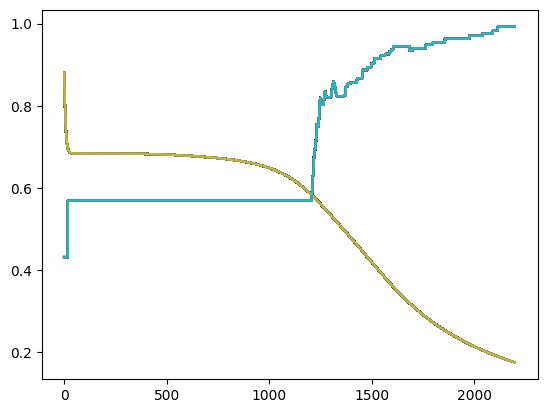

In [140]:
X=data[['experience_years','projet']].to_numpy()
Y=data['embaucher'].to_numpy().reshape(-1,1)

# Initiation dernier couches toujours 1
couches=np.array([8, 4, 1])
params=init_weights(X.shape[1],couches)
params=reseau_neurone(X,Y,params,couches,epoch=2200,learning_rate=0.1)



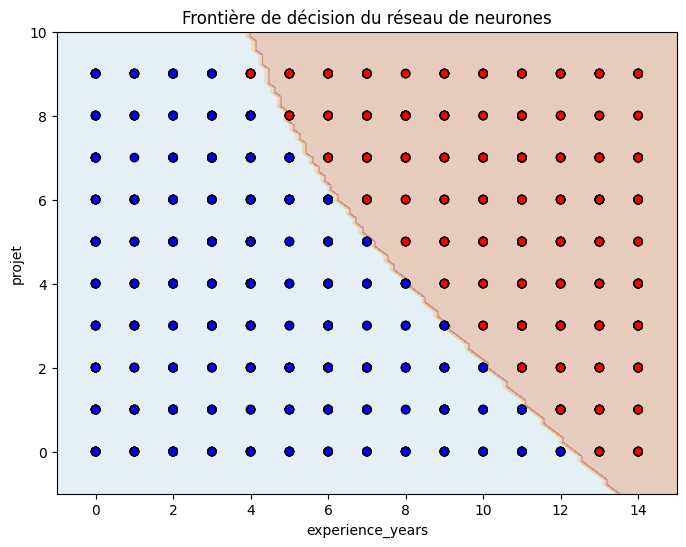

In [141]:
x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
y_min,y_max=X[:,1].min()-1,X[:,1].max()+1
xx,yy=np.meshgrid(np.linspace(x_min,x_max,100),np.linspace(y_min,y_max,100))
grid=np.c_[xx.ravel(),yy.ravel()]
grid.shape
zz=predict(grid,params,couches)
zz=zz.reshape(xx.shape)
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, zz, cmap=plt.cm.Paired, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='bwr', edgecolors='k')
plt.xlabel('experience_years')
plt.ylabel('projet')
plt.title('Frontière de décision du réseau de neurones')
plt.show()

In [ ]:
X=np.array([[20,20]])
a=predict(X,w1,b1,w2,b2)
if a==1:
    print("embaucher")
else:
    print("non embaucher")

non embaucher
